In [57]:
## Setting up 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import gzip
import csv, os
from os import listdir
from os.path import isfile, join
import sys

In [58]:
## Set the dataset name
data = 'GSE82187'

## Paths for input and output
inpath = './GSE82187/'  # Folder where your raw data is located
outpath = f'./{data}_output/'  # Output directory (optional)

## Create the output directory if it doesn't exist
try:
    os.makedirs(outpath)
except FileExistsError:
    print("Output directory already exists.")

Output directory already exists.


In [59]:
## Load meta data (GSE82187_meta.csv)
meta = pd.read_csv(os.path.join(inpath, data + '_meta.csv'))

## Load sample data (GSE82187_sample.csv)
aux = pd.read_csv(os.path.join(inpath, data + '_sample.csv'))

## Load raw expression data from .csv.gz file
raw_data = pd.read_csv(os.path.join(inpath, 'GSE82187_cast_all_forGEO.csv.gz'))

In [60]:
## Quick check on the dataset 
raw_data.head()

,Unnamed: 0,cell.name,type,experiment,protocol,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,...,Xkr9,Xlr4c,Zfp352,Zfp366,Zfp36l3,Zfp474,Zfp735,Zfp936,Zic5,Zscan10
0,1,1-0-0-0-BTN22-C34-8ul-1,Neuron,BTN22,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2,1-0-0-0-BTN24-C29-18ul-IL5195-708-502,Neuron,BTN24,Mic-scRNA-Seq,0.0,1.828000,0.000000,0.0,1.751656,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,3,1-0-0-0-BTN24-C59-22ul-IL5195-710-505,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.016060,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,4,1-0-0-0-BTN24-C70-12ul-IL5195-709-508,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.547597,3.004959,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,5,1-0-0-0-BTN24-C76-8ul-IL5195-701-507,Neuron,BTN24,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [61]:
meta['GEO_Accession (exp)']

0       GSM2188962
1       GSM2188962
2       GSM2188962
3       GSM2188962
4       GSM2188963
           ...    
3769    GSM2190168
3770    GSM2190168
3771    GSM2190168
3772    GSM2190168
3773    GSM2190169
Name: GEO_Accession (exp), Length: 3774, dtype: object

In [62]:
## filter out only 'Mic-scRNA-Seq' data items
Exp_Name_list = []
Cell_type_list = []
for idx_p, protocol in enumerate(raw_data['protocol']):
    if protocol == 'Mic-scRNA-Seq':
        Exp_Name_list.append( raw_data['cell.name'][idx_p])
        Cell_type_list.append(raw_data['type'][idx_p])

In [63]:
## assign "accession" to each experiment (name)
Sample_Name_list = []
for exp_name in Exp_Name_list:
    found = False
    for idx_s, sample in enumerate(aux['Accession']):
        if exp_name in aux['Title'][idx_s]:
            found = True
            break
    if found == False:
        print('Exp name in raw data and aux file does not match')
    Sample_Name_list.append(sample)

In [64]:
# validation 
no_dup = 0
for idx_s, sample in enumerate(Sample_Name_list):
    Exp_Name_list[idx_s] = Exp_Name_list[idx_s].split()[0]
    found = False
    for idx, geo in enumerate(meta['GEO_Accession (exp)']):
        if sample == geo:
            if found == False:
                found = True
                index = idx
            else:
                no_dup += 1
                if meta['major_cell_type'][idx] != meta['major_cell_type'][index]:
                    print('cell type of duplicate does not match!')
                    break
    if found == False:
        print('Sample name not found in meta data')

In [65]:
##Look into the list and find the numbers of unique cells in the dataset
unique = list(set(Cell_type_list))
unique.sort()

N = len(Sample_Name_list)
print('Number of cells:', N)

Number of cells: 705


In [66]:
##Do a quick check to make sure that raw data and labels match
cell_name_check = list(raw_data['cell.name'])
cell_type_check = list(raw_data['type'])

In [67]:
len(cell_name_check), len(Exp_Name_list)

(1208, 705)

In [68]:
raw_data.head() 

,Unnamed: 0,cell.name,type,experiment,protocol,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,...,Xkr9,Xlr4c,Zfp352,Zfp366,Zfp36l3,Zfp474,Zfp735,Zfp936,Zic5,Zscan10
0,1,1-0-0-0-BTN22-C34-8ul-1,Neuron,BTN22,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2,1-0-0-0-BTN24-C29-18ul-IL5195-708-502,Neuron,BTN24,Mic-scRNA-Seq,0.0,1.828000,0.000000,0.0,1.751656,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,3,1-0-0-0-BTN24-C59-22ul-IL5195-710-505,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.016060,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,4,1-0-0-0-BTN24-C70-12ul-IL5195-709-508,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.547597,3.004959,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,5,1-0-0-0-BTN24-C76-8ul-IL5195-701-507,Neuron,BTN24,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [69]:
#construct the gene list
gene_list = list(raw_data.keys())[5:]   #the first row contains the gene info
for idx_gene, gene in enumerate(gene_list):
    gene_list[idx_gene] = gene.upper()

In [70]:
# create a matrix and transpose
MATRIX = raw_data.values[:705, 5:].astype(float)
MATRIX = MATRIX.T

In [71]:
## Checking if the dimension of the gene and cell matches  
if MATRIX.shape[0] == len(gene_list) and MATRIX.shape[1] == N:
    print('Dimension of the gene and cell matches!')
else:
    print('WARNING: DIMENSION OF THE MATRIX DOES NOT MATCH')

Dimension of the gene and cell matches!


In [72]:
## Write data for full data
cell_type_unique = unique

In [73]:
# write the dictionary with the cell type and its counts 
cell_type_dict = {i: cell_type_unique[i] for i in range(len(cell_type_unique)) }  #dict to map index to cell type
cell_type_dict_rev = {cell_type_unique[i]:i for i in range(len(cell_type_unique))}  #reverse dict from cell type to index
file = open(outpath + data + '_full_labeldict.txt', 'w')   #write a dictionary
file.writelines(str(cell_type_dict) + ' \n')
file.writelines(str(cell_type_dict_rev) + ' \n')
file.close()
cell_count =  {cell_type_unique[i]:0 for i in range(len(cell_type_unique))}
Sample_Name_list = Sample_Name_list
Cell_label_list = []

In [74]:
for idx in range(len(Cell_type_list)):  #iterate over all the samples
    cell_type = Cell_type_list[idx]     #get the current cell type
    try:   #see if the cell type exist in the dictionary
        cell_label = cell_type_dict_rev[cell_type]
        cell_count[cell_type] += 1
        Cell_label_list.append(cell_label)
        found = True
    except:
        found = False    #if it is not found, print message
        print(Sample_Name_list[idx], cell_type, 'Wrong cell type')

In [75]:
# Determine number of clusters  
for k in cell_count.keys():
    print('%s:'%k, cell_count[k])

Astro: 107
Ependy-C: 18
Ependy-Sec: 21
Macrophage: 71
Microglia: 48
NSC: 7
Neuron: 334
OPC: 13
Oligo: 43
Vascular: 43


In [76]:
## # Write full_labels.csv (Sample Name, Cell type, Label)
with open(outpath + data + '_full_labels.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Sample Name', 'Cell type', 'Label'])
    for idx in range(len(Cell_type_list)):
        writer.writerow([Sample_Name_list[idx], Cell_type_list[idx] , Cell_label_list[idx]])        

In [55]:
# Write full_gene.csv (Index, Gene)
with open(outpath + data + '_full_gene.csv', "w", newline = '') as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['Index', 'Gene'])
    for idx, gene in enumerate(gene_list):
        writer.writerow([idx, gene])

In [54]:
# Write full_data.csv (sparse triplet: Row, Col, Val)
with open(outpath + data + '_full_data.csv', "w", newline = '') as csv_file: #output file for data
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['Row', 'Col', 'Val'])
    for idx_col in range(len(Sample_Name_list)):
        for idx_row in range(len(gene_list)):
            if MATRIX[idx_row, idx_col] > 0:
                writer.writerow([idx_row, idx_col, MATRIX[idx_row, idx_col]])

In [53]:
# Write full_X.csv (dense gene × cell matrix)
with open(outpath + data + '_full_X.csv', "w", newline = '') as csv_file: #output file for data
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow( [None] + Sample_Name_list)
    for idx_row in range(len(gene_list)):
        row = list(MATRIX[idx_row, :])
        writer.writerow([gene_list[idx_row] ] + row)

In [26]:
## Use PCA to run clustering
import numpy as np
import pandas as pd
import warnings
import os
import sys
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [27]:
from PCA import PCA_cal_projections

In [28]:
import os
os.getcwd()

'/home/m1deng/BIPN 162 Project'

In [29]:
# Load data
X = pd.read_csv('/home/m1deng/BIPN 162 Project/GSE82187_output/GSE82187_full_X.csv', index_col=0).values
y = pd.read_csv('/home/m1deng/BIPN 162 Project/GSE82187_output/GSE82187_full_labels.csv')['Label'].values

In [30]:
# Transpose to (features × samples)
X = X.T

# Log-transform and filter low-variance genes (filtered out the lowest 25%)
log_X = np.log(X + 1)
log_X[log_X < 1e-6] = 0

row_variances = np.var(log_X, axis=1)
threshold = np.percentile(row_variances, 25)
filtered_X = log_X[row_variances >= threshold]

In [32]:
## Filter out rare classes (< 15 cells)
filtered_X_T = filtered_X.T
unique_classes, class_counts = np.unique(y, return_counts=True)
rare_classes = unique_classes[class_counts < 15]
mask = ~np.isin(y, rare_classes)

In [33]:
class_counts
## we can see that there are 8 classes that are greater than 15 (which are included in the analysis!)

array([107,  18,  21,  71,  48,   7, 334,  13,  43,  43])

In [34]:
print('filtered_X shape:', filtered_X.shape)
print('mask shape:', mask.shape)
print('y shape:', y.shape)

filtered_X shape: (529, 18840)
mask shape: (705,)
y shape: (705,)


In [35]:
# Log transformation, normalization with the matrix

X_filtered = log_X[mask, :]   # (filtered samples × genes)
y_filtered = y[mask]               # (filtered samples,)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_filtered).T  # (genes × samples)

In [36]:
X_filtered.shape

(685, 18840)

In [37]:
y_filtered.shape

(685,)

In [38]:
k = np.unique(y_filtered).shape[0] # Num Clusters = Num Dimensions
print(k)

8


In [39]:
from PCA import PCA_cal_projections
#### Running PCA Clustering ####
PDM = PCA_cal_projections(X_normalized.T, 8)
PDM = np.asarray(PDM)
TM = ((np.linalg.inv(PDM.T @ PDM)) @ (PDM.T)).T

In [40]:
# Projected Data Matrix
Q = (X_normalized.T @ TM)

In [41]:
## Functions derived from the article 
## Calculate k means (important for clustering)
def computeKMeans(X, y, max_state = 30):
    '''
        compute k-means clustering for the reduction with 30 random instance
        input:
            X: M x N data
            y: M * 1 true labels
            max_state: number of k-means state
        return:
            LABELS: max_state * M label from k-means
            ARI: max_state * 1 ari for each instance of k-means
            NMI: max_state * 1 nmi for each instance of k-means
            Sil: max_state * 1 silhouette score for each instance of k-means
    '''
    M = X.shape[0]
    n_clusters = np.unique(y).shape[0]
    X_scaled = StandardScaler().fit_transform(X)
    LABELS = np.zeros([max_state, M])
    ARI = np.zeros(max_state); NMI = np.zeros(max_state); ECS = np.zeros(max_state)
    for state in range(max_state):
        myKM = KMeans(n_clusters = n_clusters,  n_init = 150, random_state = state)
        myKM.fit(X_scaled)
        label = myKM.labels_
        ARI[state], NMI[state] = computeClusterScore(y, label)
        ECS[state] = computeElementCenstricScore(y, label)
        LABELS[state, :] = label
    return ARI, NMI, ECS

In [42]:
def computeClusterScore(y, label):
    #compute the clustering scores
    #ARI, NMI scores
    ari = adjusted_rand_score(y, label)
    nmi = normalized_mutual_info_score(y, label)
    return ari, nmi

In [43]:
## ECS score Computation 
def computeElementCenstricScore(y, label):
    clustering1 = Clustering().from_membership_list(y)
    clustering2 = Clustering().from_membership_list(label)
    score = sim.element_sim(clustering1, clustering2, alpha=0.9)
    return score

In [44]:
from clusim.clustering import Clustering
import clusim.sim as sim

In [45]:
#Clustering; took the average about 30 runs
PCA_ari, PCA_nmi, PCA_ecs = computeKMeans(Q, y_filtered, max_state=30)
PCA_ari_mean = (PCA_ari.sum()) / 30
PCA_nmi_mean = (PCA_nmi.sum()) / 30
PCA_ecs_mean = (PCA_ecs.sum()) / 30
print('PCA ARI:', PCA_ari_mean)
print('PCA NMI:', PCA_nmi_mean)
print('PCA Element Centric Score:', PCA_ecs_mean)

PCA ARI: 0.740411718758652
PCA NMI: 0.8759709310510656
PCA Element Centric Score: 0.7369750059774566


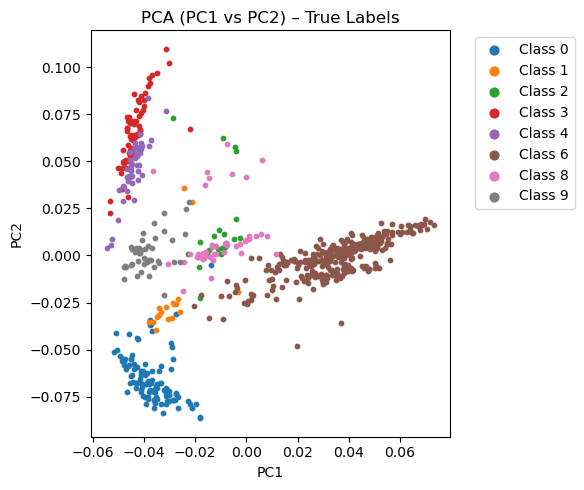

In [46]:
## Clustering graph! 
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
unique_lbls = np.unique(y_filtered)
for lbl in unique_lbls:
    idx = np.where(y_filtered == lbl)[0]
    plt.scatter(Q[idx, 0], Q[idx, 1], s=10, label=f"Class {lbl}")
plt.title("PCA (PC1 vs PC2) – True Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()